# **CAPSTONE PROJECT MODULE 2**

## *1. Latar Belakang, Permasalahan, dan Tujuan*

Airbnb sebagai perusahaan terkemuka dalam penyediaan layanan penyewaan penginapan (berupa villa, rumah, apartment, dan kamar hotel) di seluruh dunia dengan ribuan listing yang tersebar di 100.000 kota di berbagai negara. Airbnb juga memiliki kehadiran yang signifikan di kota Bangkok, Thailand. Saat ini, Airbnb Bangkok merasa penting untuk melakukan evaluasi menyeluruh terhadap performa berbagai listing yang ada di bawah payungnya. 

Tujuan dari evaluasi ini adalah untuk mengidentifikasi aspek-aspek tertentu yang mungkin memerlukan optimalisasi atau peningkatan. Dalam konteks ini, beberapa parameter kunci yang menjadi fokus analisis meliputi:
- Pengaruh kategori distrik terhadap jumlah listing yang diminati
- Identifikasi 10 Distrik Teratas Berdasarkan Jumlah Listing
- Pengaruh kategori distrik terhadap harga penyewaan
- Persentase listing yang telah menerima review dari tamu
- Tingkat ketersediaan listing
- Identifikasi pemilik listing yang memiliki lebih dari satu listing yang terdaftar

Hasil dari analisis ini akan memberikan wawasan berharga kepada Manajemen Airbnb Bangkok untuk membantu mereka mengambil keputusan yang lebih cerdas dan berfokus pada perbaikan layanan yang akan meningkatkan pengalaman bagi para tamu dan pemilik listing di Kota Bangkok.

## *2. Import Library dan Load Dataset*

In [1]:
#Import library yang akan digunakan

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

Dataset yang digunakan adalah: Airbnb Listings Bangkok.csv

In [2]:
#Load dataset

data = pd.read_csv('Airbnb Listings Bangkok.csv')
data

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## *3. Data Understanding*

### *Aspek-Aspek Dalam Data*

Dataset ini memuat beragam informasi terkait setiap properti yang telah terdaftar sebagai listing di Airbnb Bangkok. Dalam dataset ini, terdapat 17 kolom yang mengandung berbagai informasi yang relevan.

| Nama Kolom| Deskripsi |
|-----------|------|
| id  | Angka unik untuk mengidentifikasi listing   |
| name   | Nama listing   |
| host_id   | Angka unik untuk mengidentifikasi pemilik listing (host)   |
| host_name   | Nama host   |
| neighbourhood   | Lokasi distrik dari setiap listing (ditentukan berdasarkan titik koordinat)   |
| latitude   | Titik lintang   |
|longitude|Titik bujur|
|room_type|Jenis listing (entire home/apt, private room, shared room, dan hotel room)|
|price|Harga listing (per malam)|
|minimum_nights|Jumlah minimum malam yang diperlukan untuk menginap|
|number_of_reviews|Jumlah review|
|last_review|Tanggal review terakhir|
|calculated_host_listings_count|Jumlah listing yang dimiliki oleh host|
|availability_365|Jumlah hari availability|
|number_of_reviews_ltm|Jumlah review selama 12 bulan ke belakang|

Selain itu terdapat penambahan kolom ke dalam dataset untuk mendukung analisis yang akan dilakukan, yaitu:
|Nama Kolom|Deskripsi|
|-----------|------|
|neighbourhood_category|Kategori distrik (Tourist Area, Shopping Area, Entertainment Area, Resident Area, dan Other)|
|review|Keterangan mengenai listing sudah mendapatkan review atau belum|

Berikut ini adalah penjelasan mengenai detail kolom room_type:
|room_type|Deskripsi|
|-----------|------|
|entire home/apt|Jenis listing yang menyewakan seluruh bangunan untuk tamu. Biasanya ini termasuk sebuah kamar tidur, sebuah kamar mandi, sebuah dapur, dan sebuah pintu masuk yang terpisah dan khusus.|
|private room|Jenis listing yang menyewakan kamar tidur pribadi untuk tidur dan mungkin akan berbagi beberapa ruang dengan orang lain.|
|shared room|Jenis listing yang menyewakan kamar tidur dan ruangan lainnya dengan berbagi bersama orang lain.|
|hotel room|Jenis listing yang menyewakan sebuah kamar tidur di sebuah hotel.|

Berikut ini adalah penjelasan mengenai detail kolom neighbourhood_category:
|neighbourhood_category|Deskripsi|
|-----------|------|
|Tourist Area|Distrik yang terdapat tempat wisata terkenal|
|Shopping Area|Distrik yang terdapat mall/shopping center besar|
|Entertainment Area|Distrik yang terdapat pub, nightclub, night streetfood|
|Resident Area|Distrik yang ditujukan untuk area tempat tinggal|
|Other|Distrik-distrik selain kategori di atas (multipurpose area, industy area, airport area, military area, commercial area, dan unknown)|


In [3]:
#Melihat detail masing-masing kolom berupa: 
# 1. nama kolom
# 2. jenis data
# 3. jumlah missing value
# 4. persentase missing value
# 5. jumlah unique value
# 6. sample unique value

summary = []
for column in data.columns:
    dtype = data[column].dtype
    null_count = data[column].isna().sum()
    null_percentage = round((null_count / len(data)) * 100, 2)
    n_unique = data[column].nunique()
    unique_samples = data[column].unique()[:2]
    
    summary.append({
        'dataFeature': column,
        'dataType': dtype,
        'null': null_count,
        'nullPct': null_percentage,
        'unique': n_unique,
        'uniqueSample': unique_samples
    })
summary_final = pd.DataFrame(summary)
summary_final

,dataFeature,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.00,15854,"[0, 1]"
1,id,int64,0,0.00,15854,"[27934, 27979]"
2,name,object,8,0.05,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,int64,0,0.00,6659,"[120437, 120541]"
4,host_name,object,1,0.01,5312,"[Nuttee, Emy]"
5,neighbourhood,object,0,0.00,50,"[Ratchathewi, Bang Na]"
6,latitude,float64,0,0.00,9606,"[13.75983, 13.66818]"
7,longitude,float64,0,0.00,10224,"[100.54134, 100.61674]"
8,room_type,object,0,0.00,4,"[Entire home/apt, Private room]"
9,price,int64,0,0.00,3040,"[1905, 1316]"


Pada dataset ini terdapat missing value di kolom name, host_name, last_review, dan reviews_per_month.

## *4. Data Cleaning*

**Outline**

Berikut adalah tahapan data cleaning yang akan dilakukan pada dataset ini:
- Mengatasi missing value
    - Mengisi missing value pada kolom 'name'
    - Mengisi missing value pada kolom 'host_name'
    - Mengisi missing value pada kolom 'last_review'
    - Mengisi missing value pada kolom 'reviews_per_month'
- Memeriksa duplikasi data
- Memperbaiki penulisan nama-nama distik
- Pemeriksaan distribusi data dan outliers
- Menghapus kolom yang tidak diperlukan
- Menambah kolom
    - Menambahkan kolom 'neighbourhood_category'
    - Menambahkan kolom 'review'
- Menampilkan hasil data cleaning

### *Mengatasi Missing Value*

Penanganan missing value dapat dilakukan dengan mengisi menggunakan sebuah nilai atau menghapusnya. Lebih disarankan untuk mengisi missing value dengan nilai yang mencerminkan data seakurat mungkin, karena menghapusnya dapat mengurangi jumlah data yang tersedia.

Pada dataset ini, missing value akan diatasi dengan pengisian nilai agar seluruh data dapat digunakan pada analisis.

#### *Mengisi Missing Value pada Kolom Name*

In [4]:
#Menampilkan baris-baris yang mengandung missing value pada kolom 'name'

data[data['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Dari 8 listing tanpa nama, teridentifikasi bahwa host pada index 2075 memiliki total 3 listing sehingga memungkinkan untuk memeriksa nama-nama listing yang sudah dimiliki oleh host tersebut.



In [5]:
#Menampilkan data dengan host_id = 73275200

data[data['host_id'] == 73275200]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Dari tiga listing yang dimiliki oleh Pakaphol terdapat dua listing lain dengan nama yang sama, namun kedua listing tersebut terletak pada koordinat latitude dan longitude yang berbeda. Oleh karena itu tidak terdapat pola yang dapat mengidentifikasi secara pasti untuk mengisi listing tanpa nama tersebut dengan nama listing lain yang dimiliki oleh Pakaphol.

Oleh karena itu, 8 listing tanpa nama akan diisi dengan 'No Name'.

In [6]:
#Mengganti missing value di kolom 'name' dengan text 'No Name' secara permanen

data['name'].fillna('No Name',inplace=True)

#### *Mengisi Missing Value pada Kolom host_name*

In [7]:
#Menampilkan baris-baris yang mengandung missing value pada kolom 'host_name'

data[data['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Teridentifikasi bahwa host_name yang kosong tersebut memiliki host_id = 137488762. Selanjutnya dilakukan pencarian data menggunakan host_id tersebut.

In [8]:
#Menampilkan data dengan host_id = 137488762

data[data['host_id'] == 137488762]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Setelah dilakukan pencarian data berdasarkan host_id, ditemukan bahwa hanya terdapat satu entri data dengan host id = 137488762. Oleh karena itu, host_name yang kosong akan diisi dengan 'No Name' karena tidak ada referensi yang tersedia untuk mengisi missing value tersebut.

In [9]:
# Mengganti missing value di kolom 'host_name' dengan text 'No Name' secara permanen

data['host_name'].fillna('No Name',inplace=True)

#### *Mengisi Missing Value pada Kolom last_review*

In [10]:
#Menampilkan baris-baris yang mengandung missing value pada kolom 'last_review'

data[data['last_review'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Terlihat bahwa terdapat 5790 baris yang mengandung missing value pada kolom 'last_review'. Selain itu dapat terlihat secara sekilas bahwa missing value tersebut terjadi pada listing-listing dengan kondisi jumlah review = 0. Oleh karena itu perlu dipastikan kembali hubungan antara kedua kondisi tersebut.

In [11]:
#Menampilkan baris-baris yang mengandung missing value pada kolom 'last_review' dan kolom 'number_of_reviews' yang bernilai nol

data[(data['last_review'].isna()) & (data['number_of_reviews'] == 0)]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Seluruh missing value pada kolom 'last_review' merupakan listing-listing tanpa review/belum direview (jumlah review = 0). Dengan adanya hubungan ini maka missing value pada kolom 'last_review' dapat diisi dengan angka nol.

In [12]:
#Mengganti missing value di kolom 'last_review' dengan angka nol secara permanen

data['last_review'].fillna(0,inplace=True)

#### *Mengisi Missing Value pada Kolom Reviews_Per_Month*

In [13]:
#Menampilkan baris-baris yang mengandung missing value pada kolom 'reviews_per_month'

data[data['reviews_per_month'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,0,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,NaN,14,365,0


Terlihat bahwa terdapat 5790 baris yang mengandung missing value pada kolom 'reviews_per_month'. Seperti pada missing value pada kolom 'last_review', secara sekilas bahwa missing value tersebut terjadi pada listing-listing dengan kondisi jumlah review = 0. Oleh karena itu perlu dipastikan kembali hubungan antara kedua kondisi tersebut.

In [14]:
data[(data['reviews_per_month'].isna()) & (data['number_of_reviews'] == 0)]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,0,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,NaN,14,365,0


Seluruh missing value pada kolom 'reviews_per_month' merupakan listing-listing tanpa review/belum direview (jumlah review = 0). Dengan adanya hubungan ini maka missing value pada kolom 'reviews_per_month' dapat diisi dengan angka nol.

In [15]:
#Mengganti missing value di kolom 'reviews_per_month' dengan angka nol secara permanen

data['reviews_per_month'].fillna(0,inplace=True)

### *Memeriksa Duplikasi Data*

In [16]:
#Mengecek keberadaan data yang duplikat

data[data.duplicated()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Pada dataset ini tidak terdapat duplikasi data.

### *Memperbaiki penulisan nama-nama distrik*

Setelah dilakukan verifikasi melalui sumber Wikipedia, ditemukan bahwa terdapat empat distrik dalam dataset yang memiliki penulisan yang tidak tepat. Berikut adalah daftar distrik dengan penulisan yang tidak tepat:
|Penulisan Distrik Pada Dataset|Penulisan Distrik yang Benar|
|------------------------------|----------------------------|
|Bang Kho laen|Bang Kho Laem|
|Thawi Watthana|Watthana|
|Parthum Wan|Pathum Wan|
|Bang Khun thain|Bang Khun Thian|

Oleh karena itu perlu dilakukan perbaikan penulisan nama-nama distrik tersebut.

In [17]:
#Mengganti nama Bang Kho laen menjadi Bang Kho Laem yang terdapat di kolom 'neighbourhood' secara permanen

data['neighbourhood'].replace('Bang Kho laen','Bang Kho Laem',inplace=True)

In [18]:
#Mengganti nama Thawi Watthana menjadi Watthana yang terdapat di kolom 'neighbourhood' secara permanen

data['neighbourhood'].replace('Thawi Watthana','Watthana',inplace=True)

In [19]:
#Mengganti nama Parthum Wan menjadi Pathum Wan yang terdapat di kolom 'neighbourhood' secara permanen

data['neighbourhood'].replace('Parthum Wan','Pathum Wan',inplace=True)

In [20]:
#Mengganti nama Bang Khun thain menjadi Bang Khun Thian yang terdapat di kolom 'neighbourhood' secara permanen

data['neighbourhood'].replace('Bang Khun thain','Bang Khun Thian',inplace=True)

### *Pemeriksaan Distribusi Data dan Outliers*

Langkah berikutnya adalah melakukan pemeriksaan terhadap data numerik dengan berfokus pada identifikasi outliers serta distribusi datanya.

#### *Distribusi data*

In [21]:
#import function uji normalitas
from scipy.stats import kstest

#nama kolom yang akan diuji
kolom_uji = ['price','number_of_reviews','reviews_per_month','minimum_nights','availability_365','number_of_reviews_ltm']

#List kosong untuk menaruh hasil uji distribusi setiap kolom
list = []

#Melakukan looping uji normalitas untuk setiap kolom yang sudah ditaruh dalam list kolom_uji
for i in kolom_uji : 
    ks,pvalue = kstest((data[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,price,0.0,berdistribusi tidak normal
1,number_of_reviews,0.0,berdistribusi tidak normal
2,reviews_per_month,0.0,berdistribusi tidak normal
3,minimum_nights,0.0,berdistribusi tidak normal
4,availability_365,0.0,berdistribusi tidak normal
5,number_of_reviews_ltm,0.0,berdistribusi tidak normal


Berdasarkan uji normalitas yang telah dilakukan menunjukkan bahwa data-data pada kolom 'price', 'number_of_reviews', 'reviews_per_month', 'minimum_nights', 'availability_365', dan 'number_of_reviews_ltm' **berdistribusi tidak normal**

#### *Pemeriksaan Outliers*

<Axes: >

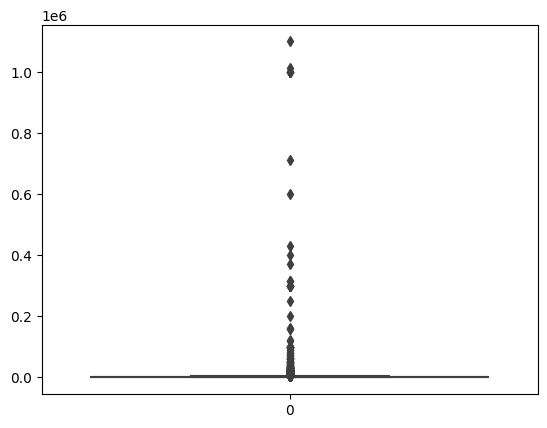

In [22]:
#Menampilkan boxplot untuk kolom 'price'

sns.boxplot(data['price'])

Berdasarkan boxplot di atas menunjukkan bahwa data-data pada kolom 'price' mengandung banyak outliers dan data bersifat **right skewed**.

<Axes: >

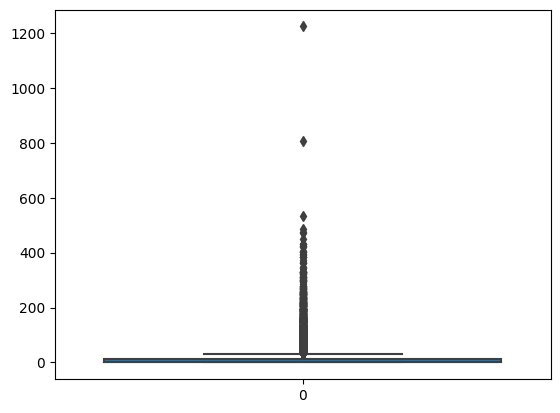

In [23]:
#Menampilkan boxplot untuk kolom 'number_of_reviews'

sns.boxplot(data['number_of_reviews'])

Berdasarkan boxplot di atas menunjukkan bahwa data-data pada kolom 'number_of_reviews' mengandung banyak outliers dan data bersifat **right skewed**.

<Axes: >

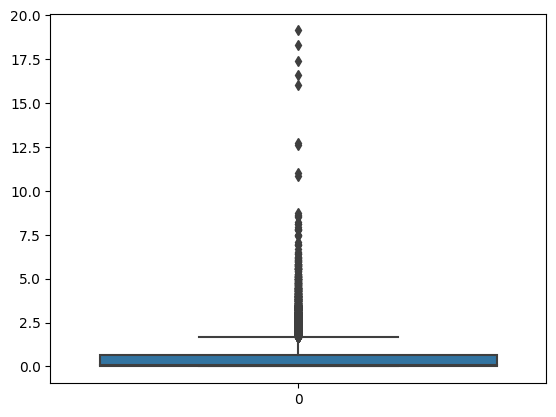

In [24]:
#Menampilkan boxplot untuk kolom 'reviews_per_month'

sns.boxplot(data['reviews_per_month'])

Berdasarkan boxplot di atas menunjukkan bahwa data-data pada kolom 'reviews_per_month' mengandung banyak outliers dan data bersifat **right skewed**.

<Axes: >

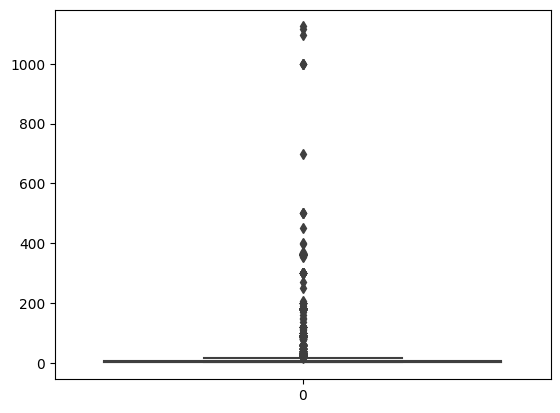

In [25]:
#Menampilkan boxplot untuk kolom 'minimum_nights'

sns.boxplot(data['minimum_nights'])

Berdasarkan boxplot di atas menunjukkan bahwa data-data pada kolom 'minimum_nights' mengandung banyak outliers dan data bersifat **right skewed**.

<Axes: >

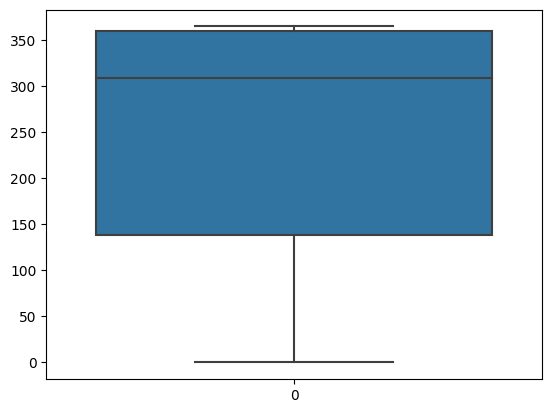

In [26]:
#Menampilkan boxplot untuk kolom 'availability_365'

sns.boxplot(data['availability_365'])

Berdasarkan boxplot di atas menunjukkan bahwa data-data pada kolom 'availability_365' tidak terdapat outliers karena seluruh data berkisar antara 0 hingga 365.

<Axes: >

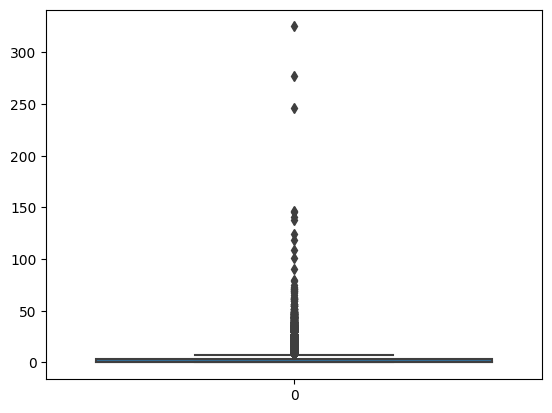

In [27]:
#Menampilkan boxplot untuk kolom 'number_of_reviews_ltm'

sns.boxplot(data['number_of_reviews_ltm'])

Berdasarkan boxplot di atas menunjukkan bahwa data-data pada kolom 'number_of_reviews_ltm' mengandung banyak outliers dan data bersifat **right skewed**.

Meskipun dalam kolom 'price', 'number_of_reviews', 'reviews_per_month', 'minimum_nights', dan 'number_of_reviews_ltm' terdapat outliers yang bernilai sangat ekstrem, namun tetap diputuskan untuk mempertahankan data-data tersebut tanpa menghapusnya. Hal ini dimaksudkan untuk memastikan dataset tetap menggambarkan kondisi masing-masing listing.

### *Menghapus kolom yang tidak diperlukan*

Dilakukan penghapusan kolom 'Unnamed: 0' dari dataset ini karena tidak relevan karena merupakan pengulangan dari nomor index dataframe.

In [28]:
#Menghapus kolom 'Unnamed: 0' secara permanen

data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0


### *Menambah kolom*

Demi mendukung analisis yang direncanakan, perlu ditambahkan dua kolom baru ke dalam dataset ini, yaitu kolom 'neighbourhood_category' dan kolom 'review'.

#### *Menambahkan kolom neighbourhood_category*

Akan dilakukan pengelompokkan distrik menjadi empat kategori, yaitu:
- Tourist Area: untuk distrik yang terdapat tempat wisata terkenal
- Shopping Area: untuk distrik yang terdapat mall/shopping center besar
- Entertainment Area: untuk distrik yang terdapat pub, nightclub, night streetfood
- Resident Area: untuk distrik yang ditujukan untuk area tempat tinggal
- Other: untuk distrik-distrik selain kategori di atas

In [29]:
#Menampilkan unique value pada kolom 'neighbourhood'

data['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho Laem', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Watthana', 'Pathum Wan', 'Pra Wet', 'Phra Nakhon',
       'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang', 'Dusit',
       'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun Thian', 'Taling Chan', 'Bang Bon'], dtype=object)

Berdasarkan hasil research yang telah dilakukan, berikut adalah hasil kategorisasi yang diperoleh:
|Neighbourhood Category|Nama Distrik|
|-----------|------|
|Tourist Area|Bangkok Yai, Pathum Wan, Phra Nakhon, Samphanthawong, Bang Phlat, Pom Prap Sattru Phai|
|Shopping Area|Chatu Chak, Ratchathewi, Khlong San, Vadhana, Watthana, Taling Chan|
|Entertainment Area|Bang Na, Bang Rak, Wang Thong Lang, Huai Khwang|
|Resident Area|Thon buri, Bang Kapi, Bang Kho Laem, Phaya Thai, Phra Khanong, Suanluang|
|Other|Din Daeng, Rat Burana, Sathon, Khlong Toei, Sai Mai, Lat Krabang, Phasi Charoen, Bang Sue, Nong Chok, Pra Wet, Yan na wa, Don Mueang, Dusit, Lak Si, Bueng Kum, Saphan Sung, Min Buri, Khan Na Yao, Khlong Sam Wa, Bang Khen, Lat Phrao, Chom Thong, Bangkok Noi, Nong Khaem, Thung khru, Bang Khae, Bang Khun Thian, Bang Bon|

In [30]:
#Membuat kolom 'neighbourhood_category' dengan mengelompokkan masing-masing distrik sesuai dengan pengkategoriannya.

data['neighbourhood_category'] = data['neighbourhood'].apply (lambda x: 'Tourist Area' if x in ('Bangkok Yai', 'Pathum Wan', 'Phra Nakhon', 'Samphanthawong', 'Bang Phlat', 'Pom Prap Sattru Phai')  else 'Shopping Area' if x in ('Chatu Chak','Ratchathewi','Khlong San','Vadhana','Watthana','Taling Chan') else 'Entertainment Area' if x in ('Bang Na','Bang Rak','Wang Thong Lang','Huai Khwang') else 'Resident Area' if x in ('Thon buri','Bang Kapi','Bang Kho Laem','Phaya Thai','Phra Khanong','Suanluang') else 'Other')
data


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_category
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Shopping Area
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0,Entertainment Area
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0,Resident Area
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Other
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0,Resident Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0,Other
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0,Shopping Area
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0,Shopping Area
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0,Shopping Area


#### *Menambahkan kolom review*

Akan dilakukan penambahan sebuah kolom baru untuk mengelompokkan listing yang sudah memiliki review dan listing yang belum memiliki review.

In [31]:
#Membuat kolom 'review' dengan kondisi:
#Apabila number_of_reviews > 0 maka dikelompokkan sebagai listing yang sudah memiliki review
#Apabila number_of_reviews <= 0 maka dikelompokkan sebagai listing yang belum memiliki review

data['review'] = data['number_of_reviews'].apply (lambda x: 'Has Review' if x > 0 else 'Not Reviewed Yet')
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_category,review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Shopping Area,Has Review
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0,Entertainment Area,Not Reviewed Yet
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0,Resident Area,Not Reviewed Yet
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Other,Has Review
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0,Resident Area,Not Reviewed Yet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0,Other,Not Reviewed Yet
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0,Shopping Area,Not Reviewed Yet
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0,Shopping Area,Not Reviewed Yet
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0,Shopping Area,Not Reviewed Yet


### *Hasil Data Cleaning*

In [32]:
#Menampilkan dataset yang telah dibersihkan

data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_category,review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Shopping Area,Has Review
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0,Entertainment Area,Not Reviewed Yet
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,0.00,1,365,0,Resident Area,Not Reviewed Yet
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Other,Has Review
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0,Resident Area,Not Reviewed Yet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,0.00,1,362,0,Other,Not Reviewed Yet
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,0.00,14,365,0,Shopping Area,Not Reviewed Yet
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,0.00,14,365,0,Shopping Area,Not Reviewed Yet
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,0.00,14,365,0,Shopping Area,Not Reviewed Yet


In [52]:
#Menyimpan dataset yang sudah bersih ke dalam format .csv

data.to_csv('Airbnb-Clean-Fix.csv')

## *5. Analisis Data*

**Outline**

Berikut adalah analisis yang akan dilakukan pada dataset ini:
- Pengaruh kategori distrik terhadap jumlah listing yang diminati
- Mengidentifikasi 10 Distrik Teratas Berdasarkan Total Listing
- Pengaruh kategori distrik terhadap harga penyewaan
- Persentase listing yang telah menerima review dari tamu
- Tingkat ketersediaan listing
- Identifikasi pemilik listing yang memiliki lebih dari satu listing yang terdaftar

### *Pengaruh kategori distrik terhadap jumlah listing yang diminati*

In [33]:
#Membuat variabel 'listing_per_area' untuk menghitung jumlah listing berdasarkan kategori distrik dan diurutkan dari jumlah terbesar
listing_per_area = data[['id','neighbourhood_category']].groupby('neighbourhood_category').count().sort_values(by = 'id',ascending=False).reset_index()

#Mengganti nama kolom yang ada di variabel 'listing_per_area'
listing_per_area.rename(columns={'neighbourhood_category': 'Neighbourhood Category', 'id' : 'Total'},inplace=True)

#Menampilkan variabel 'listing_per_area'
listing_per_area

,Neighbourhood Category,Total
0,Other,5548
1,Shopping Area,4234
2,Entertainment Area,2510
3,Resident Area,1944
4,Tourist Area,1618


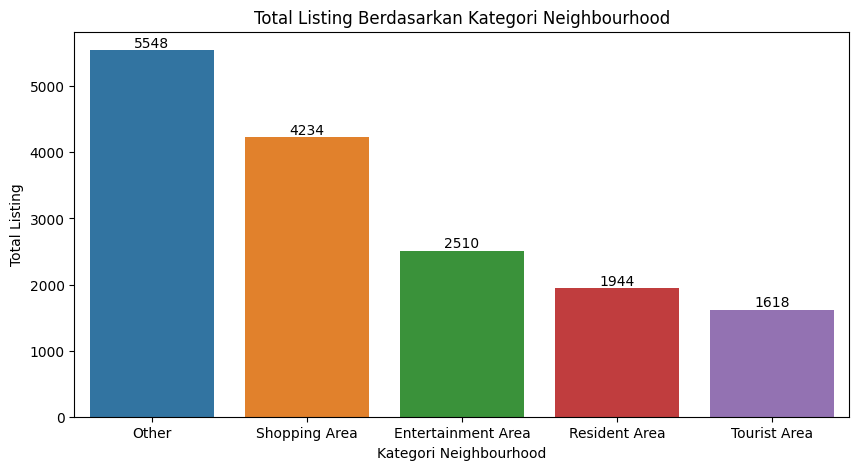

In [56]:
#Membuat kanvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar dari variabel 'listing_per_area'
ax = sns.barplot(data = listing_per_area, x = 'Neighbourhood Category', y ='Total')

#Menampilkan label masing-masing bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('Total Listing Berdasarkan Kategori Neighbourhood')

#Menambahkan x label
plt.xlabel('Kategori Neighbourhood')

#Menambahkan y label
plt.ylabel('Total Listing')

#Menampilkan grafik
plt.show()

Secara keseluruhan, Other Area memiliki jumlah listing terbanyak, dan ini disebabkan oleh adanya 28 distrik yang termasuk dalam kategori Other Area.

In [35]:
#Membuat variabel 'room_type_per_area' untuk menghitung jumlah listing berdasarkan kategori distrik dan jenis listing dan diurutkan dari jumlah terbesar
room_type_per_area = data[['id','room_type','neighbourhood_category']].groupby(['neighbourhood_category','room_type']).count().reset_index()

#Mengganti nama kolom yang ada di variabel 'room_type_per_area'
room_type_per_area.rename(columns={'neighbourhood_category':'Neighbourhood Category','room_type':'Room Type','id':'Total'}, inplace=True)

#Menampilkan variabel 'room_type_per_area'
room_type_per_area

,Neighbourhood Category,Room Type,Total
0,Entertainment Area,Entire home/apt,1438
1,Entertainment Area,Hotel room,101
2,Entertainment Area,Private room,908
3,Entertainment Area,Shared room,63
4,Other,Entire home/apt,3268
5,Other,Hotel room,154
6,Other,Private room,2018
7,Other,Shared room,108
8,Resident Area,Entire home/apt,1042
9,Resident Area,Hotel room,43


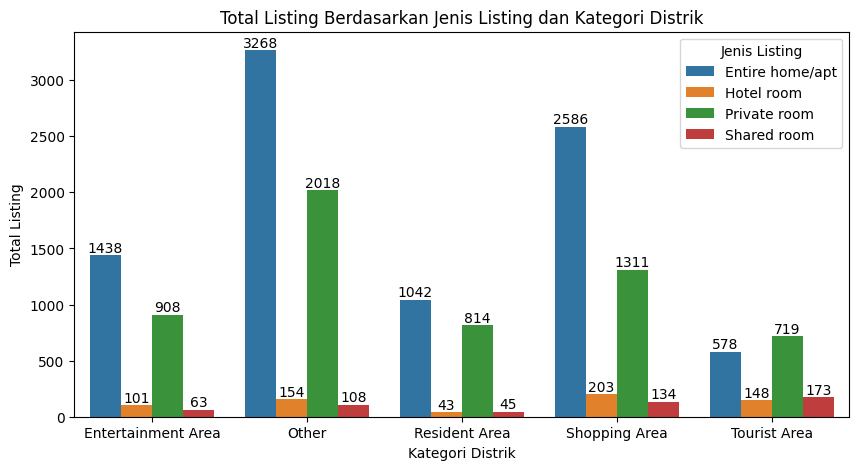

In [59]:
#Membuat kanvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar untuk menghitung total listing yang dibagi berdasarkan jenis listing dan kategori distrik
ax = sns.barplot(data = room_type_per_area, x = 'Neighbourhood Category', y = 'Total', hue ='Room Type')

#Menampilkan label masing-masing bar
for i in range(room_type_per_area['Room Type'].nunique()):
    ax.bar_label(ax.containers[i], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('Total Listing Berdasarkan Jenis Listing dan Kategori Distrik')

#Menambahkan x label
plt.xlabel('Kategori Distrik')

#Menambahkan y label
plt.ylabel('Total Listing')

#Menambahkan judul legenda grafik
plt.legend(title='Jenis Listing')

#Menampilkan grafik
plt.show()

Namun, ketika memecah data ini lebih lanjut, dapat melihat bahwa preferensi jenis listing bervariasi di antara berbagai kategori area seperti Shopping Area, Entertainment Area, Resident Area, dan Other. Secara khusus, di Shopping Area, Entertainment Area, dan Resident Area, jenis listing entire home/apartment merupakan yang paling diminati. Sementara itu, di Tourist Area, lebih banyak ditemukan jenis listing private room. Hal ini menunjukkan bahwa setiap area memiliki preferensi yang berbeda dalam hal jenis listing yang mereka cari.

Hal ini dapat menunjukkan fokus tampilan aplikasi airbnb untuk lebih mengutamakan jenis listing yang banyak terdapat di area-area tersebut.

### *Idendentifikasi 10 Distrik Teratas Berdasarkan Total Listing*

In [37]:
#Membuat variabel 'property_count_head' untuk menghitung 10 distrik teratas berdasarkan total listingnya
property_count_head = data[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id',ascending=False).head(10).reset_index()

#Mengganti nama kolom yang ada di variabel 'property_count_head'
property_count_head.rename(columns={'neighbourhood':'Neighbourhood','id':'Total'}, inplace=True)

#Menampilkan variabel 'room_type_per_area'
property_count_head

,Neighbourhood,Total
0,Vadhana,2153
1,Khlong Toei,2097
2,Huai Khwang,1125
3,Ratchathewi,1114
4,Bang Rak,827
5,Sathon,809
6,Phra Nakhon,619
7,Phra Khanong,558
8,Chatu Chak,548
9,Bang Na,458


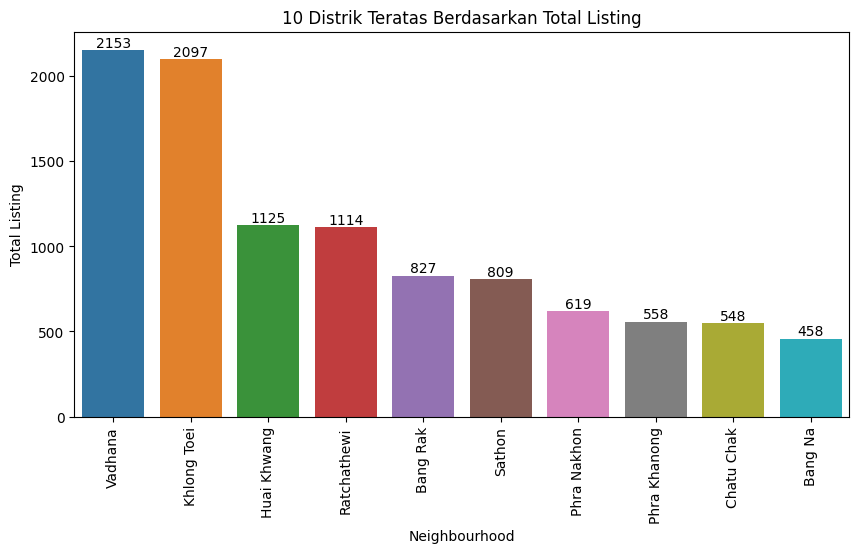

In [60]:
#Membuat kanvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar dari variabel 'property_count_head'
ax = sns.barplot(data = property_count_head, x = 'Neighbourhood', y='Total')

#Menampilkan label masing-masing bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('10 Distrik Teratas Berdasarkan Total Listing')

#Menambahkan x label
plt.xlabel('Neighbourhood')

#Menambahkan y label
plt.ylabel('Total Listing')

#Merotasi axis X
plt.xticks(rotation = 90)

#Menampilkan grafik
plt.show()

Distrik-distrik yang muncul dalam grafik ini adalah yang memiliki jumlah listing terbanyak. Ini bisa menjadi indikasi bahwa distrik-distrik tersebut sangat diminati oleh pemilik listing untuk memperoleh profit dan pengguna Airbnb karena distrik-distrik tersebut menarik untuk menjadi destinasi.

### *Pengaruh kategori distrik terhadap harga penyewaan* 

In [65]:
#Membuat variabel 'category_price' untuk menghitung rata-rata harga sewa berdasarkan kategori distrik dan diurutkan dari jumlah terbesar
category_price = data[['neighbourhood_category','price']].groupby('neighbourhood_category').median().sort_values(by='price',ascending=False).reset_index()

#Mengganti nama kolom yang ada di variabel 'category_price'
category_price.rename(columns={'neighbourhood_category':'Neighbourhood Category','price':'Rata-Rata Harga Sewa'}, inplace=True)

#Menampilkan variabel 'category_price'
category_price

,Neighbourhood Category,Rata-Rata Harga Sewa
0,Shopping Area,1657.0
1,Tourist Area,1500.0
2,Entertainment Area,1375.0
3,Other,1300.0
4,Resident Area,1094.0


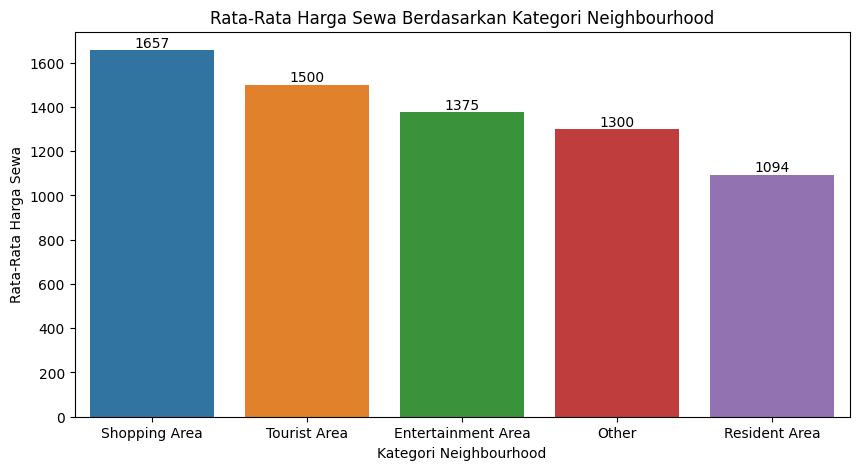

In [69]:
#Membuat kanvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar dari variabel 'category_price'
ax = sns.barplot(data = category_price, x = 'Neighbourhood Category', y = 'Rata-Rata Harga Sewa')

#Menampilkan label masing-masing bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('Rata-Rata Harga Sewa Berdasarkan Kategori Neighbourhood')

#Menambahkan x label
plt.xlabel('Kategori Neighbourhood')

#Menambahkan y label
plt.ylabel('Rata-Rata Harga Sewa')

#Menampilkan grafik
plt.show()

Secara umum, tourist area, shopping area, dan entertainment area memiliki rata-rata harga sewa listing yang lebih tinggi dibandingkan other area dan resident area.

In [66]:
#Membuat variabel 'property_price' untuk menghitung rata-rata harga sewa listing berdasarkan kategori distrik dan jenis listing dan diurutkan dari jumlah terbesar
property_price = data[['neighbourhood_category','room_type','price']].groupby(['neighbourhood_category','room_type']).median().sort_values(by='price',ascending=False).reset_index()

#Mengganti nama kolom yang ada di variabel 'property_price'
property_price.rename(columns={'neighbourhood_category':'Neighbourhood Category','room_type':'Jenis Listing','price':'Rata-Rata Harga Sewa'}, inplace=True)

#Menampilkan variabel 'property_price'
property_price

,Neighbourhood Category,Jenis Listing,Rata-Rata Harga Sewa
0,Tourist Area,Entire home/apt,2000.0
1,Tourist Area,Hotel room,1839.5
2,Shopping Area,Hotel room,1839.0
3,Entertainment Area,Hotel room,1839.0
4,Shopping Area,Entire home/apt,1801.0
5,Other,Hotel room,1529.0
6,Other,Entire home/apt,1500.0
7,Shopping Area,Private room,1490.0
8,Tourist Area,Private room,1446.0
9,Entertainment Area,Entire home/apt,1388.0


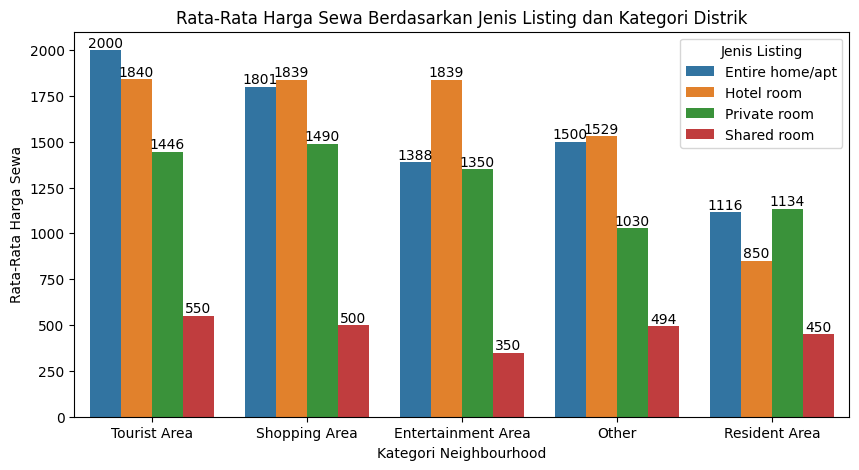

In [68]:
#Membuat kanvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar untuk menghitung rata-rata harga sewa listing yang dibagi berdasarkan jenis listing dan kategori distrik
ax = sns.barplot(data = property_price, x = 'Neighbourhood Category', y = 'Rata-Rata Harga Sewa', hue ='Jenis Listing')

#Menampilkan label masing-masing bar
for i in range(data['room_type'].nunique()):
    ax.bar_label(ax.containers[i], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('Rata-Rata Harga Sewa Berdasarkan Jenis Listing dan Kategori Distrik')

#Menambahkan x label
plt.xlabel('Kategori Neighbourhood')

#Menambahkan y label
plt.ylabel('Rata-Rata Harga Sewa')

#Menambahkan judul legenda grafik
plt.legend(title='Jenis Listing')

#Menampilkan grafik
plt.show()

Setelah dipecah berdasarkan jenis listingnya:
- rata-rata harga sewa entire home/apartment tertinggi adalah di tourist area
- rata-rata harga sewa hotel room tertinggi adalah di tourist area
- rata-rata harga sewa private room tertinggi adalah di shopping area
- rata-rata harga sewa shared room tertinggi adalah di tourist area

Secara keseluruhan, tourist area dan shopping area mendominasi dari segi harga. Hal ini dapat menunjukkan bahwa harga sewa akan dipengaruhi oleh tingkat keramaian lokasinya.

### *Persentase listing yang telah menerima review dari tamu*

In [70]:
#Membuat variabel 'property_review' untuk menghitung jumlah listing berdasarkan ada/tidaknya review
property_review = data[['review','id']].groupby('review').count().reset_index()

#Menambahkan kolom untuk menghitung dan persentasenya
property_review['Rating_Percentage'] = round(property_review['id']/property_review['id'].sum()*100,0)

#Mengganti nama kolom yang ada di variabel 'property_review'
property_review.rename(columns={'review':'Review','id': 'Total Review','Rating_Percentage':'Persentase'}, inplace=True)

#Menampilkan variabel 'property_review'
property_review

,Review,Total Review,Persentase
0,Has Review,10064,63.0
1,Not Reviewed Yet,5790,37.0


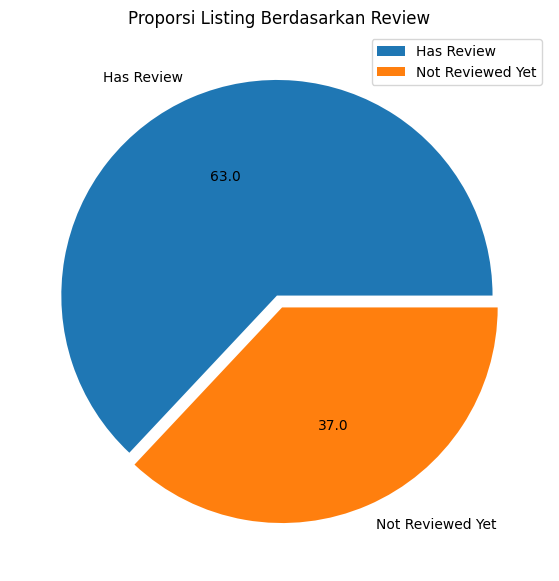

In [73]:
#Membuat canvas grafik
plt.figure(figsize=(10,7))

#Membuat grafik pie
plt.pie( 
    x = property_review['Persentase'], #value yang akan dimasukkan ke dalam pie chart
    labels = property_review['Review'], #kolom yang dijadikan patokan untuk pengkategorian di pie chart
    autopct = f'%.1f', #untuk menuliskan label masing-masing persentase
    explode = (0.03,0.03) #untuk membuat jarak masing-masing slice. Ditulis sebanyak jumlah slice
)

#Menambahkan judul grafik
plt.title('Proporsi Listing Berdasarkan Review')

#Menambahkan legenda
plt.legend()

#Menampilkan grafik
plt.show()

Dapat dilihat bahwa sekitar 37% dari listing belum menerima review. Ini menciptakan sebuah tantangan karena pengguna cenderung lebih memilih listing yang telah mendapatkan review yang baik. Listing tanpa review cenderung terabaikan oleh pengguna, dan hal ini berpotensi mempengaruhi tingkat pemesanan (booking rate) untuk listing-listing tersebut.

### *Tingkat ketersediaan listing*

In [74]:
#Membuat variabel 'avail_count' untuk menghitung 10 total listing teratas berdasarkan hari ketersediaannya
avail_count = data[['availability_365','id']].groupby('availability_365').count().sort_values(by='id',ascending=False).head(10).reset_index()

#Mengganti nama kolom yang ada di variabel 'avail_count'
avail_count.rename(columns={'availability_365':'Ketersediaan Hari','id':'Total Listing'}, inplace=True)

#Menampilkan variabel 'avail_count'
avail_count

,Ketersediaan Hari,Total Listing
0,365,2392
1,0,857
2,364,674
3,180,437
4,90,334
5,358,324
6,361,309
7,362,301
8,179,282
9,363,280


Terdapat 2392 listing yang masih tersedia hingga 365 hari ke depan. Untuk memahami perilaku pengguna dalam memilih listing. akan dianalisis mengenai pengaruh adanya review terhadap tingkat ketersediaan listing.

In [75]:
#Memfilter baris yang memiliki review = Not Reviewed Yet
filtered_data_not_reviewed = data[data['review'] == 'Not Reviewed Yet']

#Membuat variabel 'avail_count_not_reviewed' untuk menghitung 10 hari ketersediaan teratas berdasarkan total listing yang tidak memiliki review
avail_count_not_reviewed = filtered_data_not_reviewed.groupby('availability_365')['id'].count().reset_index().sort_values(by = 'id',ascending=False).head(10)

#Mengganti nama kolom yang ada di variabel 'avail_count_not_reviewed'
avail_count_not_reviewed.rename(columns={'availability_365':'Ketersediaan Hari','id':'Total Listing'}, inplace=True)

#Menampilkan variabel 'avail_count_not_reviewed'
avail_count_not_reviewed

,Ketersediaan Hari,Total Listing
298,365,1702
297,364,331
154,180,307
0,0,256
76,90,218
153,179,195
75,89,156
295,362,151
296,363,144
291,358,125


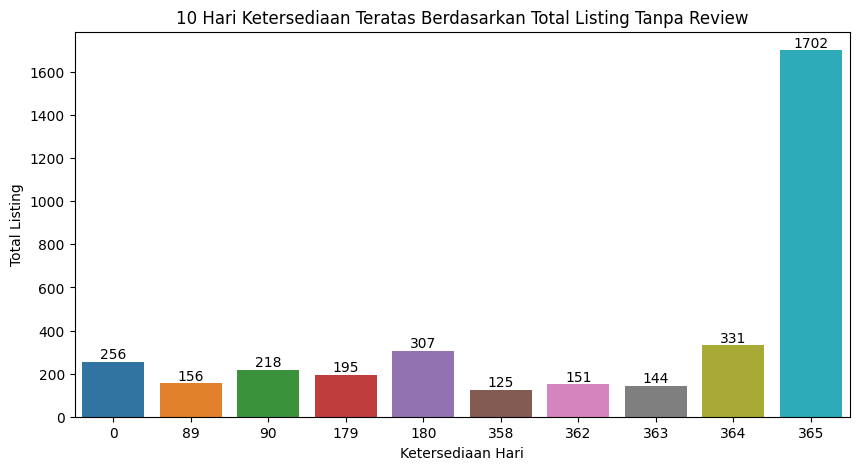

In [77]:
#Membuat canvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar dari variabel 'avail_count_not_reviewed'
ax = sns.barplot(data = avail_count_not_reviewed, x = 'Ketersediaan Hari', y = 'Total Listing')

#Menampilkan label masing-masing bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('10 Hari Ketersediaan Teratas Berdasarkan Total Listing Tanpa Review')

#Menambahkan x label
plt.xlabel('Ketersediaan Hari')

#Menambahkan y label
plt.ylabel('Total Listing')

#Menampilkan grafik
plt.show()

Dalam listing yang belum mendapatkan review, terdapat perbedaan yang signifikan antara listing yang masih memiliki ketersediaan hingga 365 hari ke depan dan listing yang sudah terisi penuh selama periode yang sama.

In [78]:
#Memfilter baris yang memiliki review = Has Review
filtered_data_reviewed = data[data['review'] == 'Has Review']

#Membuat variabel 'avail_count_reviewed' untuk menghitung 10 hari ketersediaan teratas berdasarkan total listing yang sudah memiliki review
avail_count_reviewed = filtered_data_reviewed.groupby('availability_365')['id'].count().reset_index().sort_values(by = 'id',ascending=False).head(10)

#Mengganti nama kolom yang ada di variabel 'avail_count'
avail_count_reviewed.rename(columns={'availability_365':'Ketersediaan Hari','id':'Total Listing'}, inplace=True)

#Menampilkan variabel 'avail_count_reviewed'
avail_count_reviewed

,Ketersediaan Hari,Total Listing
365,365,690
0,0,601
364,364,343
358,358,199
361,361,197
360,360,160
362,362,150
363,363,136
180,180,130
359,359,130


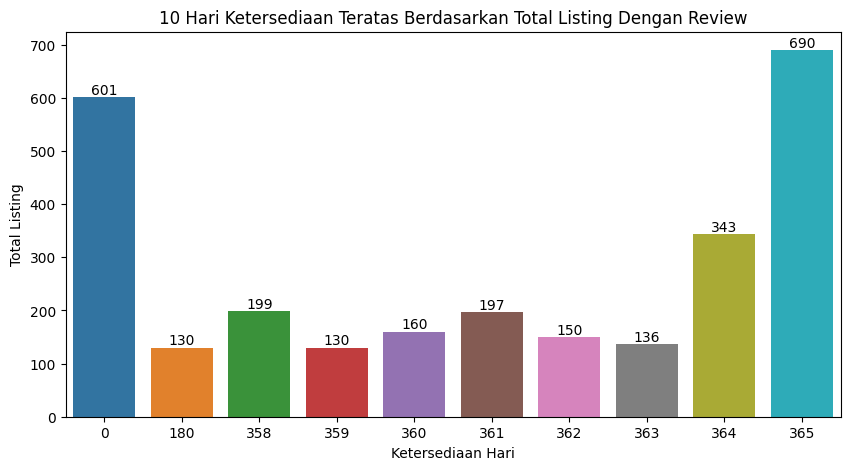

In [79]:
#Membuat canvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar dari variabel 'avail_count_reviewed'
ax = sns.barplot(data = avail_count_reviewed, x = 'Ketersediaan Hari', y = 'Total Listing')

#Menampilkan label masing-masing bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('10 Hari Ketersediaan Teratas Berdasarkan Total Listing Dengan Review')

#Menambahkan x label
plt.xlabel('Ketersediaan Hari')

#Menambahkan y label
plt.ylabel('Total Listing')

#Menampilkan grafik
plt.show()

Dalam listing-listing yang telah mendapatkan ulasan, tidak ada perbedaan yang signifikan antara listing yang masih memiliki ketersediaan hingga 365 hari ke depan dan listing yang sudah terisi penuh selama periode yang sama. 

Hal ini mengindikasikan bahwa review memiliki dampak pada tingkat availability listing.

### *Identifikasi pemilik listing yang memiliki lebih dari satu listing yang terdaftar*

In [81]:
#Mengambil host_id yang terduplikat
duplicate_host_ids = data[data['host_id'].duplicated(keep=False)]

#Memfilter baris yang memiliki jumlah listing > 1 dan host_id yang berada di variabel 'duplicate_host_ids'
filtered_data_host = data[(data['calculated_host_listings_count'] > 1) & data['host_id'].isin(duplicate_host_ids['host_id'])]

#Menampilkan hanya satu baris host_id jika ada host_id yang sama
filtered_data_host2 = filtered_data_host.drop_duplicates(subset='host_id')

#Menampilkan variabel 'filtered_data_host2'
filtered_data_host2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_category,review
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Shopping Area,Has Review
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,0.00,2,358,0,Entertainment Area,Not Reviewed Yet
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,0.00,3,365,0,Resident Area,Not Reviewed Yet
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho Laem,13.697570,100.528800,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,Resident Area,Has Review
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.720400,100.507570,Private room,700,2,4,2019-12-27,0.03,10,87,0,Shopping Area,Has Review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15736,788363014587607907,Jana & Wora Home 1st room + breakfast,477703336,Worakarn,Vadhana,13.741684,100.589119,Private room,539,1,0,0,0.00,2,355,0,Shopping Area,Not Reviewed Yet
15768,786878931060309348,复试-精品店街区/无敌景观/ 網紅餐飲區/文藝區/近日本堂吉訶德领略本土网红餐饮街,492272447,Gravity,Vadhana,13.739771,100.590069,Entire home/apt,1284,30,0,0,0.00,2,331,0,Shopping Area,Not Reviewed Yet
15789,788727200132205288,Lovely one bedroom Sukhumvit*Emquatier*BTS*Bars,492273748,Korawin,Vadhana,13.736253,100.567687,Entire home/apt,1920,1,0,0,0.00,2,360,0,Shopping Area,Not Reviewed Yet
15832,790282480427506280,Spacious Place at Pratunam,424281953,Saruta,Ratchathewi,13.754217,100.538489,Private room,640,1,0,0,0.00,4,365,0,Shopping Area,Not Reviewed Yet


Terdapat 2053 host yang memiliki lebih dari satu listing yang terdaftar. Selanjutnya, akan dilakukan analisis untuk memisahkan listing-listing tersebut berdasarkan apakah terdapat ulasan atau tidak.

In [85]:
#Membuat variabel 'reviewed_host_count' untuk menghitung total host berdasarkan ada/tidaknya review
reviewed_host_count = filtered_data_host2.groupby('review')['host_id'].count().reset_index()

#Mengganti nama kolom yang ada di variabel 'reviewed_host_count'
reviewed_host_count.rename(columns={'review':'Review','host_id':'Total Host'}, inplace=True)

#Menampilkan variabel 'reviewed_host_count'
reviewed_host_count

,Review,Total Host
0,Has Review,1528
1,Not Reviewed Yet,525


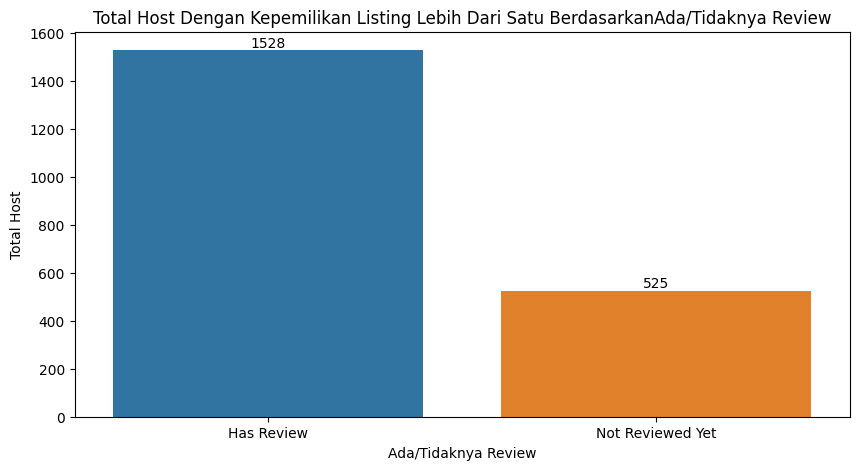

In [88]:
#Membuat canvas grafik
plt.figure(figsize=(10,5))

#Membuat grafik bar dari variabel 'avail_count_reviewed'
ax = sns.barplot(data = reviewed_host_count, x = 'Review', y = 'Total Host')

#Menampilkan label masing-masing bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('Total Host Dengan Kepemilikan Listing Lebih Dari Satu BerdasarkanAda/Tidaknya Review')

#Menambahkan x label
plt.xlabel('Ada/Tidaknya Review')

#Menambahkan y label
plt.ylabel('Total Host')

#Menampilkan grafik
plt.show()

Terdapat 525 hostyang memiliki lebih dari satu listing yang terdaftar dengan kondisi belum pernah mendapatkan ulasan pada listing-listing mereka. Hal ini sebaiknya menjadi perhatian serius bagi Airbnb.

## *6. Kesimpulan dan Rekomendasi*

### *Kesimpulan*

1. Secara keseluruhan, Other Area memiliki jumlah listing terbanyak. Namun, ketika memecah data lebih lanjut, dapat dilihat bahwa preferensi jenis listing bervariasi di antara berbagai kategori area. Secara khusus, di Shopping Area, Entertainment Area, dan Resident Area, jenis listing entire home/apartment merupakan yang paling diminati. Sementara itu, di Tourist Area, lebih banyak ditemukan jenis listing private room. Hal ini menunjukkan bahwa setiap area memiliki preferensi yang berbeda dalam hal jenis listing yang mereka cari.

2. Distrik Vadhana, Khlong Toei, Huai Khwang, Ratchathewi, Bang Rak, Sathon, Phra Nakhon, Phra Khanong, Chatu Chak, Bang Na menjadi distrik-distrik dengan jumlah listing terbanyak. Ini bisa menjadi indikasi bahwa distrik-distrik tersebut sangat diminati oleh pemilik listing untuk memperoleh profit dan pengguna Airbnb karena distrik-distrik tersebut menarik untuk menjadi destinasi.

3. Secara keseluruhan, tourist area dan shopping area mendominasi dari segi harga. Hal ini dapat menunjukkan bahwa harga sewa akan dipengaruhi oleh tingkat keramaian lokasinya.

4. Terdapat 37% listing yang belum menerima review. Hal ini berpotensi mempengaruhi tingkat pemesanan (booking rate) untuk listing-listing tersebut karena pengguna cenderung lebih memilih listing yang telah mendapatkan review.

5. Review juga berdampak pada tingkat ketersediaan listing. 

6. Terdapat 525 host yang memiliki lebih dari satu listing yang terdaftar dengan kondisi belum pernah mendapatkan ulasan pada listing-listing mereka. Hal ini sebaiknya menjadi perhatian serius bagi Airbnb.

### *Rekomendasi*

Berdasarkan analisis yang telah Anda lakukan, ada beberapa rekomendasi yang dapat diimplementasikan oleh Airbnb untuk meningkatkan kinerja dan pengalaman pengguna di Bangkok:

1. **Segmentasi Pasar dan Penawaran Khusus:** Airbnb dapat mengambil keuntungan dari preferensi berbeda dalam jenis listing di berbagai kategori area. Misalnya, Airbnb dapat mengembangkan penawaran khusus untuk mempromosikan listing jenis entire home/apartment di Shopping Area, Entertainment Area, dan Resident Area. Ini dapat mencakup penawaran harga khusus, promosi, atau fitur tambahan yang relevan.

2. **Fokus pada Distrik Populer:** Airbnb bisa bekerja sama dengan pemilik listing di distrik-distrik yang paling diminati, seperti Vadhana, Khlong Toei, dan lainnya. Ini dapat dilakukan dengan memberikan dukungan tambahan dalam hal pemasaran, perbaikan fasilitas, atau insentif bagi pemilik listing untuk menjaga kualitas layanan mereka.

3. **Penetapan Harga yang Lebih Tepat:** Mengingat bahwa tourist area dan shopping area mendominasi dari segi harga, Airbnb dapat memberikan panduan harga yang lebih terperinci kepada pemilik listing. Ini dapat membantu pemilik listing untuk menetapkan harga yang lebih kompetitif dan menarik bagi calon tamu.

4. **Stimulasi Review:** Airbnb harus mendorong pengguna untuk meninggalkan ulasan setelah menginap. Hal ini dapat dilakukan dengan memberikan insentif, seperti poin reward kepada pengguna yang memberikan ulasan. Dengan lebih banyak ulasan, listing akan menjadi lebih menarik bagi calon tamu.

5. **Perbaikan Dukungan untuk Host:** Airbnb perlu memperhatikan host yang memiliki listing dengan kondisi belum pernah mendapatkan ulasan. Mungkin ada alasan mengapa mereka belum mendapatkan ulasan, seperti masalah kualitas atau pemasaran. Airbnb bisa menawarkan pelatihan atau bantuan untuk membantu host meningkatkan kualitas listing mereka dan mendapatkan ulasan positif.

6. **Analisis Ketersediaan Listing:** Airbnb dapat menggunakan data ketersediaan listing untuk membantu host mengoptimalkan tingkat pemesanan. Dengan menganalisis tren dan pola pemesanan, Airbnb dapat memberikan rekomendasi kepada host tentang cara menghindari kekosongan yang tidak perlu.

7. **Pengembangan Fitur Lokal:** Airbnb dapat mengembangkan fitur khusus. Misalnya, panduan wisata lokal, rekomendasi restoran, atau informasi penting tentang lingkungan sekitar listing. Hal ini dapat meningkatkan pengalaman tamu dan membuat mereka lebih cenderung memberikan ulasan positif.

Rekomendasi di atas dapat membantu Airbnb meningkatkan pengalaman pengguna, meningkatkan jumlah pemesanan dan menjaga hubungan yang baik dengan host. Dengan perencanaan dan pelaksanaan yang tepat, Airbnb dapat memaksimalkan potensi pasar di kota ini.

## *7. Link Tableau*

Hasil visualisasi pada tableau dapat dilihat pada link berikut ini:
https://public.tableau.com/app/profile/yana.cunanda/viz/CapstoneModule2_16947528337320/DashboardAnalisisPerformaListing?publish=yes